<a href="https://colab.research.google.com/github/pablopuch/-ALGORITMOS-EVOLUTIVOS/blob/main/ALGORITMOS_EVOLUTIVOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

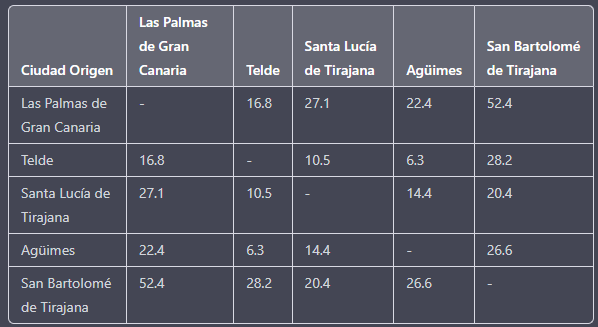

In [ ]:
def ajuste(cromosoma):
    distancia_total = 0
    for i in range(len(cromosoma)-1):
        distancia_total += distancias_ciudades[cromosoma[i]][cromosoma[i+1]]
    return distancia_total

In [ ]:
def mutacion(cromosoma):
    ciudad1 = random.randint(1, len(cromosoma)-1)
    ciudad2 = random.randint(1, len(cromosoma)-1)
    cromosoma[ciudad1], cromosoma[ciudad2] = cromosoma[ciudad2], cromosoma[ciudad1]
    return cromosoma

In [ ]:
def recombinacion(cromosoma1, cromosoma2):
    # Seleccionar dos puntos de corte aleatorios diferentes
    punto_corte1 = random.randint(1, len(cromosoma1)-1)
    punto_corte2 = random.randint(1, len(cromosoma1)-1)
    while punto_corte1 == punto_corte2:
        punto_corte2 = random.randint(1, len(cromosoma1)-1)

    # Ordenar los puntos de corte
    if punto_corte1 > punto_corte2:
        punto_corte1, punto_corte2 = punto_corte2, punto_corte1

    # Intercambiar los segmentos entre los puntos de corte para crear dos nuevos cromosomas
    nuevo_cromosoma1 = cromosoma1[:punto_corte1] + cromosoma2[punto_corte1:punto_corte2] + cromosoma1[punto_corte2:]
    nuevo_cromosoma2 = cromosoma2[:punto_corte1] + cromosoma1[punto_corte1:punto_corte2] + cromosoma2[punto_corte2:]

    return nuevo_cromosoma1, nuevo_cromosoma2

In [ ]:
def mejor_ruta(poblacion_inicial, prob_mutacion, prob_recombinacion, generaciones):
    poblacion = poblacion_inicial
    print("Poblacion:",poblacion)

    for i in range(generaciones):
        ajuste_poblacion = [ajuste(cromosoma) for cromosoma in poblacion]
        mejores_cromosomas = [poblacion[i] for i in range(len(poblacion)) if ajuste_poblacion[i] <= min(ajuste_poblacion)]

        for cromosoma in mejores_cromosomas:
            if random.random() < prob_mutacion:
                cromosoma = mutacion(cromosoma)
            if random.random() < prob_recombinacion:
                cromosoma = recombinacion(cromosoma, random.choice(mejores_cromosomas))

        poblacion = mejores_cromosomas

    # Devolvemos el mejor cromosoma encontrado
    return min(poblacion, key=ajuste)

Parámetros iniciales

In [ ]:
distancias_ciudades = np.array([
    [0.0, 16.8, 27.1, 22.4, 52.4],
    [16.8, 0.0, 10.5, 6.3, 28.2],
    [27.1, 10.5, 0.0, 14.4, 20.4],
    [22.4, 6.3, 14.4, 0.0, 26.6],
    [52.4, 28.2, 20.4, 26.6, 0.0]
])

poblacion_inicial = [np.random.permutation([0, 1, 2, 3, 4]) for i in range(5)] # genera un conjunto de 5 ciudades
prob_recombinacion = 0.7 
prob_mutacion = 0.5 
generaciones = 100 

mejor_ruta = mejor_ruta(poblacion_inicial, prob_mutacion, prob_recombinacion, generaciones)
print("La mejor ruta es ", mejor_ruta,"con Valor de Ajuste =", ajuste(mejor_ruta))

Poblacion: [array([0, 2, 4, 1, 3]), array([2, 0, 4, 3, 1]), array([2, 3, 4, 0, 1]), array([0, 2, 3, 1, 4]), array([3, 1, 4, 0, 2])]
La mejor ruta es  [0 4 1 2 3] con Valor de Ajuste = 105.5
